Question 1

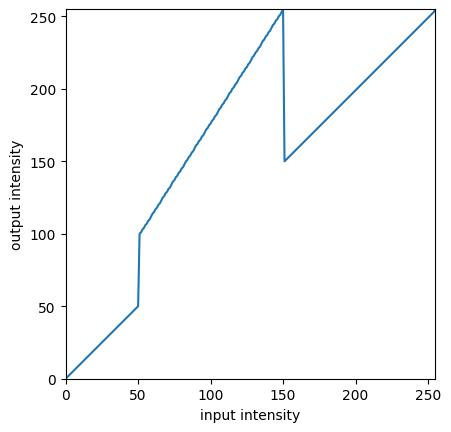

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(50,50),(51,100),(150,255),(151,150),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.a white matter


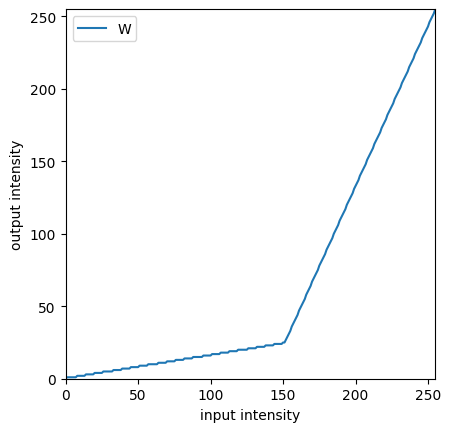

In [50]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(150,25),(151,25),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('White matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

#print(transform)

transf = cv.LUT(img, transform)
cv.namedWindow('White matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('White matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.b Gray matter enhanced

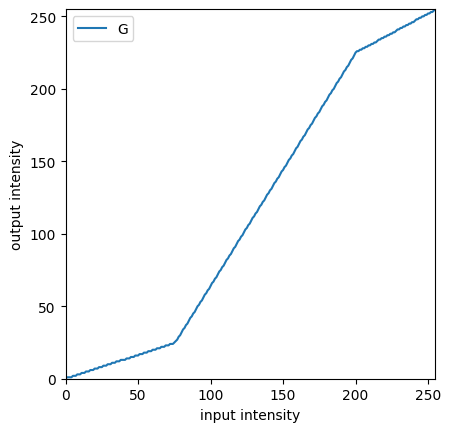

In [52]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(75,25),(76,26),(200,225),(201,226),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('Gray matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Gray matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('Gray matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 3 

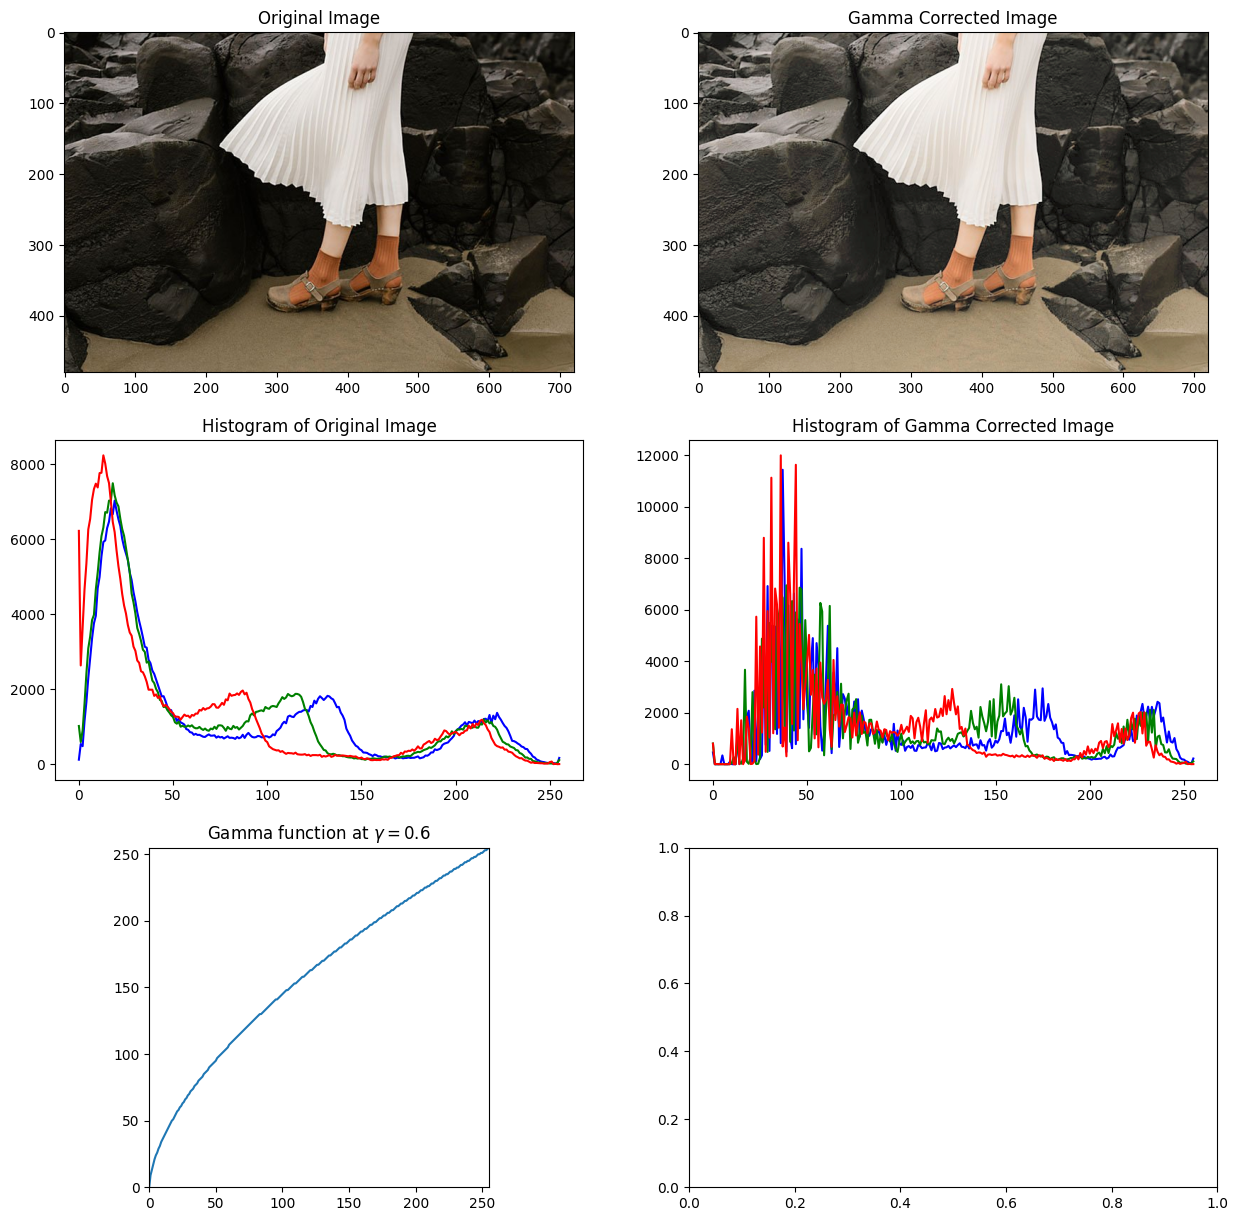

In [56]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)
gamma = 0.6
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')

img_p = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l_img, a_img, b_img = cv.split(img_p)
l_updated = cv.LUT(l_img, table)
img_gamma = cv.merge((l_updated,a_img,b_img))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3, 2, figsize=(15,15))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[1, 0].set_title('Histogram of Original Image')
axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 0].set_title('Gamma function at $\gamma = {g}$'.format(g=gamma))

plt.show()


Question 4

Value of a is  0.8


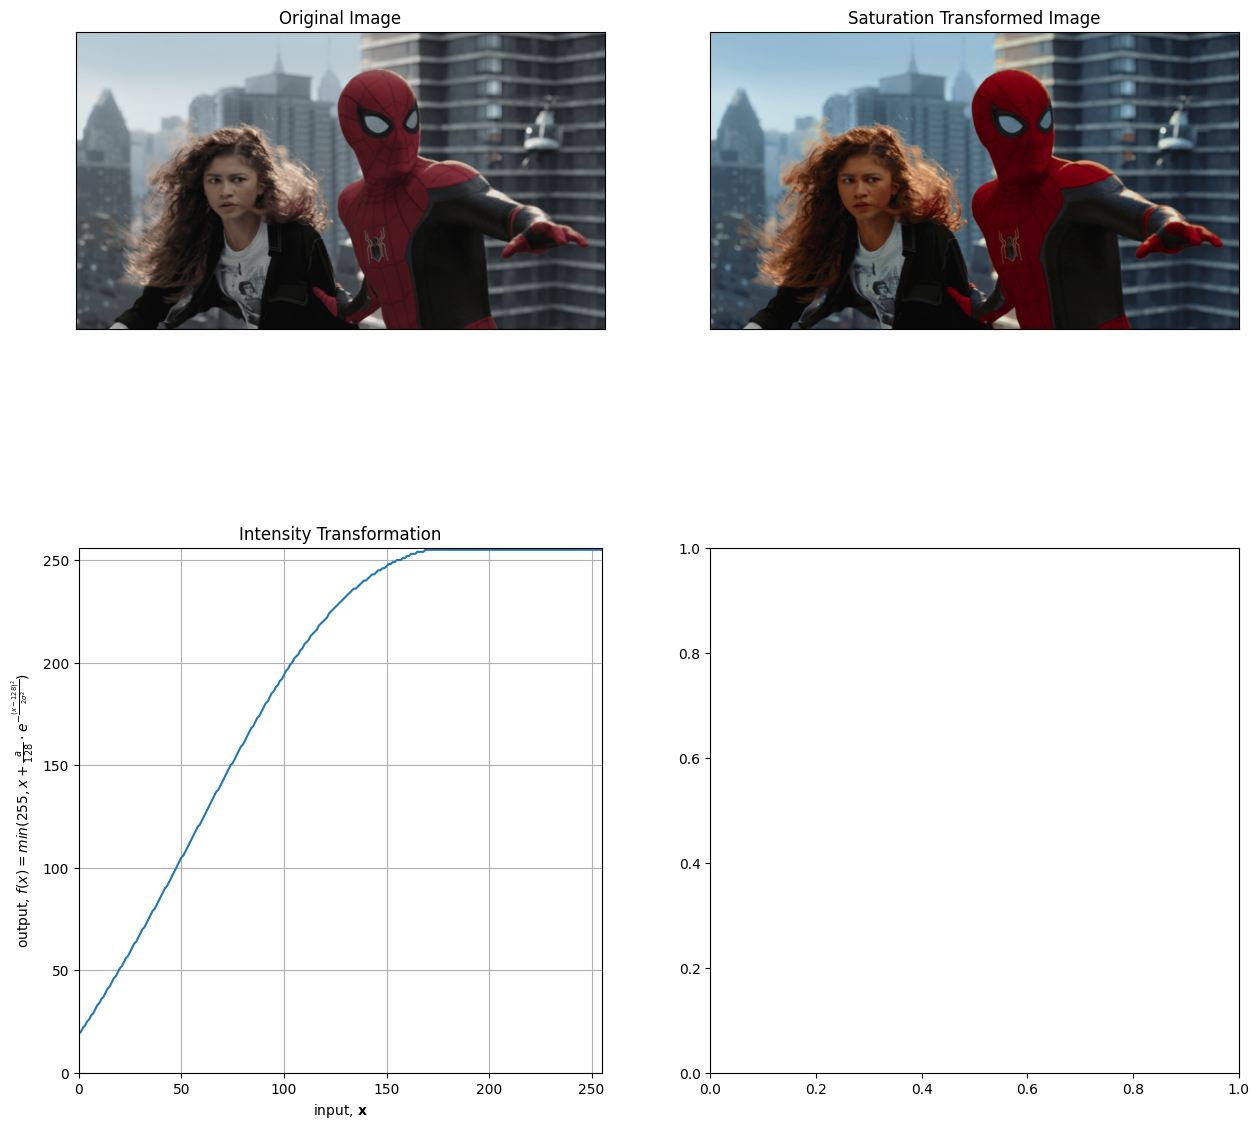

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math



img_orig = cv.imread('../spider.png', cv.IMREAD_COLOR)
sigma = 70
a = 0.8
def fn(x):
    return int(min(255,x+(a*128)*np.exp(-((x-128)**2)/(2*(sigma**2)))))
img_o = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_cvt = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img_cvt)

#print(s_img)

for i in range(len(s_img)):
    for j in range(len(s_img[0])):
        s_img[i][j] = fn(s_img[i][j])

img_edited = cv.merge((h_img, s_img, v_img))
img = cv.cvtColor(img_edited, cv.COLOR_HSV2RGB)

print('Value of a is ',a)

f, axarr = plt.subplots(2, 2, figsize=(15,15))
axarr[0, 0].imshow(img_o)
axarr[0, 1].imshow(img)
axarr[0, 0].set_xticks([])
axarr[0, 0].set_yticks([])
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Saturation Transformed Image')
axarr[0, 1].set_xticks([])
axarr[0, 1].set_yticks([])

table = np.array([fn(i) for i in np.arange(0, 256)]).astype('uint8')
#print(fn(100))

axarr[1, 0].set_title('Intensity Transformation')
#axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[1, 0].plot(table)
axarr[1, 0].grid()
axarr[1, 0].set_xlim(0, 255)
axarr[1, 0].set_ylim(0, 256)
axarr[1, 0].set_aspect('equal')
axarr[1, 0].set_xlabel('input, $\mathbf{x}$')
axarr[1, 0].set_ylabel(r'output, $f(x) = min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')
#ax.set_title(r'$f(x) = \min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')

plt.show()


Question 5

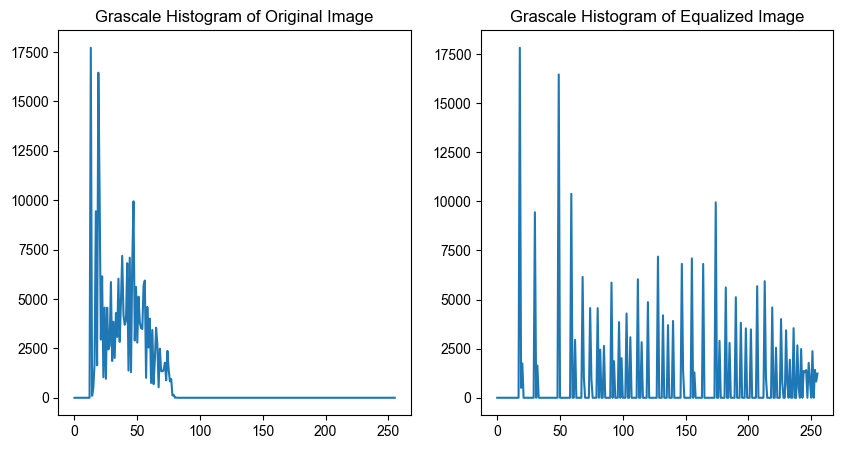

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../shells.tif', cv.IMREAD_GRAYSCALE)

def histogram_equalization(img_orig):
    histogram = np.zeros(256)
    cumilative = np.zeros(256)
    h,w = img_orig.shape #height and width
    pixels = img_orig.size
    #print(pixels)

    for i in range(h):
        for j in range(w):
            histogram[img_orig[i][j]] += 1

    cumilative[0] = histogram[0]
    for i in range(1,256):
        cumilative[i] = cumilative[i-1] + histogram[i]

    for i in range(256):
        cumilative[i] = cumilative[i]/pixels*255

    table = [np.clip(round(number), 0, 255).astype(np.uint8) for number in cumilative]
    #print(type(cumilative))
    img_done = cv.LUT(img_orig, np.array(table))

    return img_done

fig, axarr = plt.subplots(1, 2, figsize = (10,5))
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0,256])
axarr[0].plot(hist_orig)
axarr[0].set_title('Grascale Histogram of Original Image')

hist_orig = cv.calcHist([histogram_equalization(img_orig)], [0], None, [256], [0,256])
axarr[1].plot(hist_orig)
axarr[1].set_title('Grascale Histogram of Equalized Image')

cv.namedWindow('Original', cv.WINDOW_NORMAL)
cv.imshow('Original', img_orig)
cv.waitKey(0)

transf = histogram_equalization(img_orig)
cv.namedWindow('After Equalization', cv.WINDOW_NORMAL)
cv.imshow('After Equalization', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 6

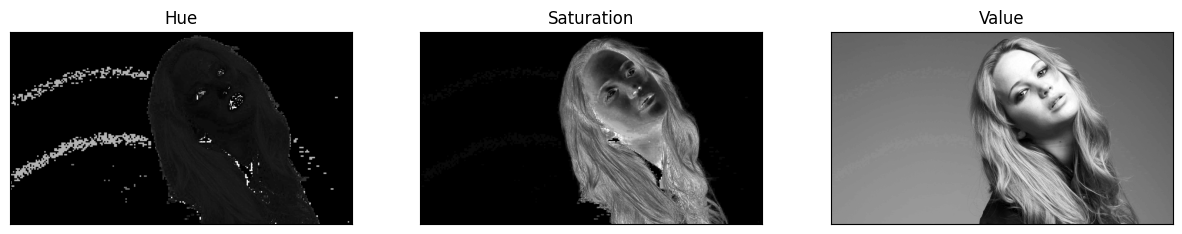

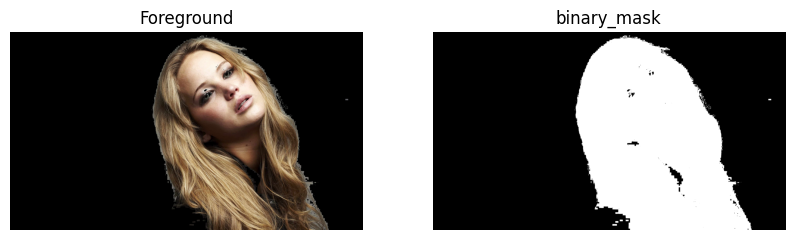

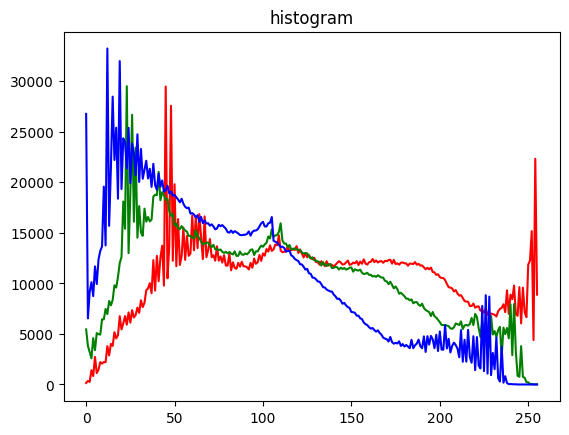

[2728920.]


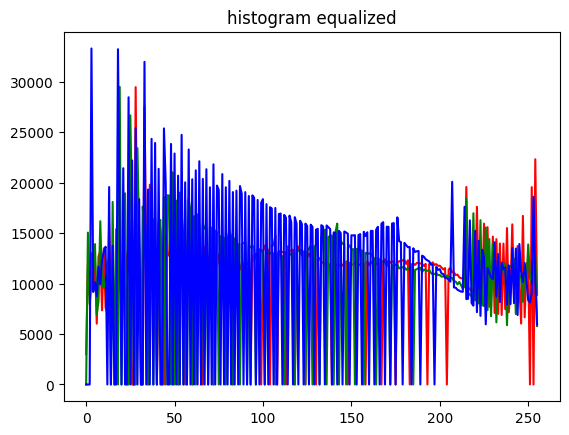

(-0.5, 3839.5, 2159.5, -0.5)

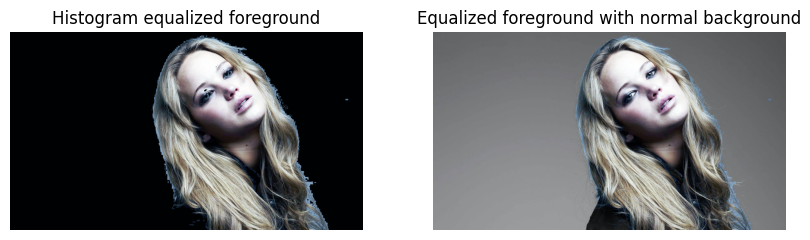

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../jeniffer.jpg', cv.IMREAD_COLOR)
img_col = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)


img_cvt = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img_cvt)
fig, ax = plt.subplots(1,3, figsize = (15,15))
ax[0].imshow(h_img, cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Hue')

ax[1].imshow(s_img, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Saturation')

ax[2].imshow(v_img, cmap='gray')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Value')

plt.show()

threshold_value = 11
_, binary_img = cv.threshold(s_img, threshold_value, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(img_col, img_col, mask=binary_img).astype(np.uint8)
img_R, img_G, img_B = cv.split(foreground)


fig, ax = plt.subplots(1,2, figsize=(10, 10))
ax[0].imshow(foreground)
ax[0].set_title('Foreground')
ax[0].axis('off')

ax[1].imshow(binary_img, cmap = 'gray')
ax[1].set_title('binary_mask')
ax[1].axis('off')

plt.show() 

histograms = []
color = ('r', 'g', 'b')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([foreground], [i], binary_img, [256], [0, 256])
    plt.plot(hist_orig, color=c)
    plt.title('histogram')
    histograms.append(hist_orig)

plt.show()

cumilative = np.cumsum(histograms, axis=1)
#print(len(histograms[0]))
print(cumilative[0][255])

for i in range(256):
    # for 'r'
    cumilative[0][i] = cumilative[0][i] * 255 / cumilative[0][255]
    cumilative[0][i] = np.clip(np.round(cumilative[0][i]), 0, 255).astype(np.uint8)
    
    # for 'g'
    cumilative[1][i] = cumilative[1][i] * 255 / cumilative[1][255]
    cumilative[1][i] = np.clip(np.round(cumilative[1][i]), 0, 255).astype(np.uint8)
    
    # for 'b'
    cumilative[2][i] = cumilative[2][i] * 255 / cumilative[2][255]
    cumilative[2][i] = np.clip(np.round(cumilative[2][i]), 0, 255).astype(np.uint8)

img_R = cv.LUT(img_R, np.array(cumilative[0]))
img_G = cv.LUT(img_G, np.array(cumilative[1]))
img_B = cv.LUT(img_B, np.array(cumilative[2]))

#print(cumilative[0])


image = cv.merge((img_R, img_G, img_B)).astype(np.uint8)

color = ('r', 'g', 'b')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([image], [i], binary_img, [256], [0, 256],)
    plt.plot(hist_orig, color=c)
    plt.title('histogram equalized')
    #histograms.append(hist_orig)

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(image)
ax[0].set_title('Histogram equalized foreground')
ax[0].axis('off')

background = (img_col - foreground)
eddited_img = (background + image)
ax[1].imshow(eddited_img)
ax[1].set_title("Equalized foreground with normal background")
ax[1].axis('off')


array([255.], dtype=float32)

Question 7

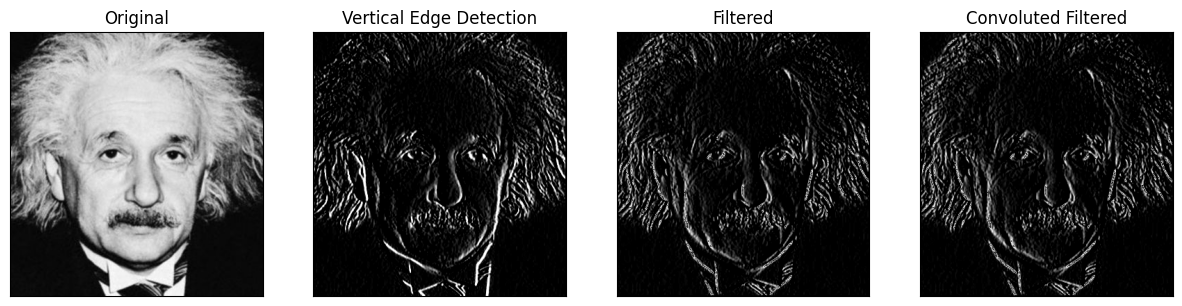

In [131]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

def k_filter(image, kernel):
    h,w = image.shape[:2]
    k_h,k_w = kernel.shape[0], kernel.shape[1]
    assert k_h%2 == 1 and k_w%2 == 1, "Kernel is not accurate please check it"
    h_start, w_start = math.floor(k_h/2), math.floor(k_w/2)

    normalized_image = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    kernel_sum = np.sum(kernel)
    normalized_kernel = kernel 

    #result image
    result = np.zeros(image.shape, dtype='float')

    #for convolution
    normalized_kernel = np.flipud(np.fliplr(normalized_kernel))

    for i in range(h_start, h-h_start):
        for j in range(w_start, w-w_start):
            result[i][j] = max(0,min(255.0,np.dot(normalized_image[i-h_start : i+h_start+1, j-w_start: j+w_start+1].flatten(), normalized_kernel.flatten())))
    #print(image)
    #print(result)
    result = 255.0 * result
    answer = result.astype(np.uint8)
    return answer

def conv(image, kernel):
    h,w = image.shape[:2]
    k_h,k_w = kernel.shape[0], kernel.shape[1]
    assert k_h%2 == 1 and k_w%2 == 1, "Kernel is not accurate please check it"
    h_start, w_start = math.floor(k_h/2), math.floor(k_w/2)
    kernel = np.flipud(np.fliplr(kernel))

    #result image
    result = np.zeros(image.shape, dtype='float')
    
    for i in range(h_start, h-h_start):
        for j in range(w_start, w-w_start):
            result[i][j] = np.dot(image[i-h_start : i+h_start+1, j-w_start: j+w_start+1].flatten(), kernel.flatten())
    
    return result

img = cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)


# Define a kernel
kernel = np.array([
    (1, 0, -1),
    (2, 0, -2),
    (1, 0, -1)
], dtype='float32')

# Apply 2D filtering with the defined kernel
imgc = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(15, 15))

# Display the original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the filtered image
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Display the filtered image
axes[2].imshow(k_filter(img, kernel), cmap="gray")
axes[2].set_title('Filtered')
axes[2].set_xticks([]), axes[2].set_yticks([])

# Define two kernels
kernel1 = np.array([[1], [2], [1]], dtype='float32')
kernel2 = np.array([1, 0, -1], dtype='float32')
kernel2 = kernel2.reshape((1, 3))

normalized_img = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
conv1 = conv(normalized_img, kernel1)
#norm_img = np.maximum(0,np.minimum(255.0,conv2))
conv2 = conv(conv1, kernel2)
norm_img = np.maximum(0,np.minimum(255.0,conv2))


img_after = norm_img * 255
img_after = img_after.astype(np.uint8)

# Display the image which is done with convolution with small kernels
axes[3].imshow(img_after, cmap="gray")
axes[3].set_title('Convoluted Filtered')
axes[3].set_xticks([]), axes[3].set_yticks([])

plt.show()

Question 8

In [167]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

def nearest_neighbour(image, scale):
    height, width, channels = image.shape
    h_zoom, w_zoom = height*scale, width*scale

    image_zoom = np.zeros((h_zoom, w_zoom, channels), dtype = np.float32)

    for h in range(h_zoom):
        for w in range(w_zoom):
            for c in range(channels):
                
                image_zoom[h][w][c] = image[int(math.floor(h/scale))][int(math.floor(w/scale))][c]

    return image_zoom.astype(np.uint8)

def bilinear_interpolation(image, scale):
    height, width, channels = image.shape
    h_zoom, w_zoom = height*scale, width*scale

    image_zoom = np.zeros((h_zoom, w_zoom, channels), dtype = np.float32)

    for h in range(h_zoom):
        for w in range(w_zoom):
            for c in range(channels):

                if ((h+1)%scale==0 and (w+1)%scale==0):
                    image_zoom[h][w][c] = image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c]
                
                elif (h%scale==0):
                    if (w<scale):
                        image_zoom[h][w][c] = (w+1)/scale * image[int((h+1)/scale) - 1][0][c]
                    else:
                        image_zoom[h][w][c] = (1 - (w+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c] + (w+1)%scale/scale * image[int((h+1)/scale) - 1][int((w+1)/scale)][c]

                elif (w%scale==0):
                    if (h<scale):
                        image_zoom[h][w][c] = (h+1)/scale * image[0][int((w+1)/scale) - 1][c]
                    else:
                        image_zoom[h][w][c] = (1 - (h+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c] + (h+1)%scale/scale * image[int((h+1)/scale)][int((w+1)/scale) - 1][c]

                else:
                    if (h<scale and w<scale):
                        image_zoom[h][w][c] = (w+1)%scale/scale * (h+1)%scale/scale * image[0][0][c]
                    elif (h<scale):
                        image_zoom[h][w][c] = (h+1)%scale/scale * ((1 - (w+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c] + (w+1)%scale/scale * image[int((h+1)/scale) - 1][int((w+1)/scale)][c])
                    elif (w<scale):
                        image_zoom[h][w][c] = (w+1)%scale/scale * ((1 - (h+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c] + (h+1)%scale/scale * image[int((h+1)/scale)][int((w+1)/scale) - 1][c])
                    else:
                        a = (1 - (h+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale) - 1][c] + (h+1)%scale/scale * image[int((h+1)/scale)][int((w+1)/scale) - 1][c]
                        b = (1 - (h+1)%scale/scale) * image[int((h+1)/scale) - 1][int((w+1)/scale)][c] + (h+1)%scale/scale * image[int((h+1)/scale)][int((w+1)/scale)][c]
                        image_zoom[h][w][c] = (1 - (w+1)%scale/scale) * a + (w+1)%scale/scale * b

    return image_zoom.astype(np.uint8)



In [168]:
img_orig = cv.imread("../zooming/im01small.png")
img_zoom = nearest_neighbour(img_orig, 4)
img_zoom1 = bilinear_interpolation(img_orig, 4)

img_zoom_original = cv.imread('../zooming/im01.png')

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_zoom_original, cv.COLOR_BGR2RGB))
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_zoom, cv.COLOR_BGR2RGB))
plt.title('zoomed nearest neighbour')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_zoom1, cv.COLOR_BGR2RGB))
plt.title('zoomed bilinear interpolation')

IndexError: index 480 is out of bounds for axis 0 with size 480

Question 9

842 562


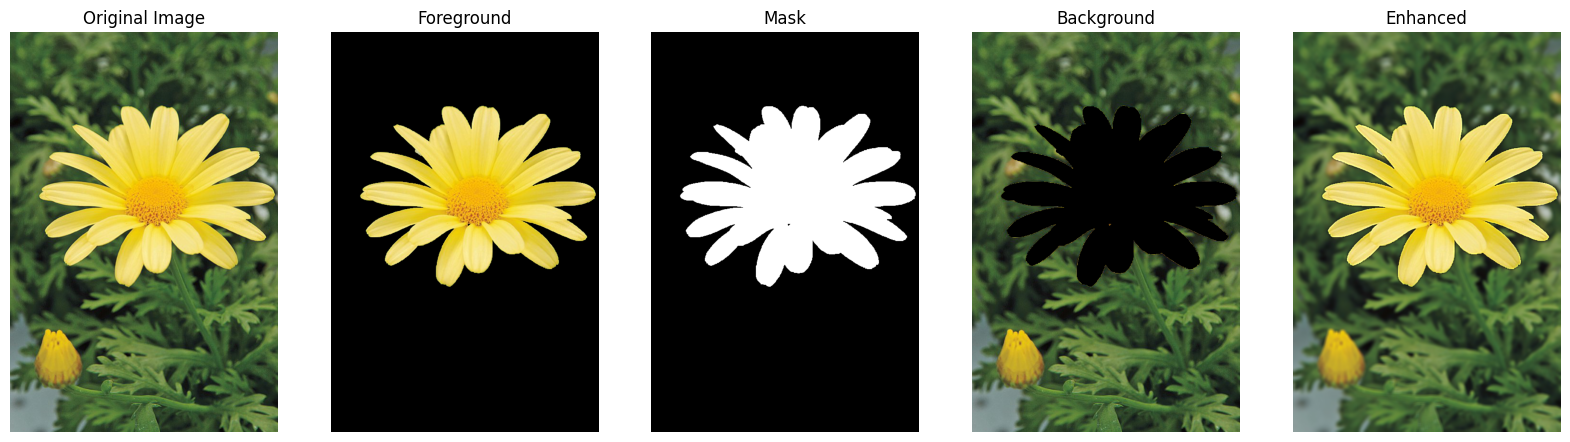

In [137]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#load the image
img_orig = cv.imread('../flower.png', cv.IMREAD_COLOR)

#get image shape
h, w, _ = img_orig.shape

#define mask
mask = np.zeros((h, w), dtype=np.uint8)
print(h, w)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# rectangle to be given
rect = (50, 100, w, h-350)
#rect = (0,0,h,w)
#rect = (0, 40, h, w)


cv.grabCut(img_orig, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

img_foreground = img_orig * mask2[:, :, np.newaxis]

img_background = cv.subtract(img_orig, img_foreground)

plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(mask2, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')


kernel_size = 7
#blurred_background = cv.GaussianBlur(img_background, (kernel_size, kernel_size), 0)
blurred_background = cv.blur(img_background, (kernel_size, kernel_size), 0)


plt.subplot(1, 5, 5)
plt.imshow(cv.cvtColor(cv.add(blurred_background,img_foreground), cv.COLOR_BGR2RGB))
plt.title('Enhanced')
plt.axis('off')
plt.show()
